## Import Libraries

In [396]:
#Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import censusdata
from scipy import stats
import seaborn as sns
import folium
import requests 
from pandas.io.json import json_normalize


## Importing DOHMH Covid-19 Data

In [ ]:
urls = ["https://raw.githubusercontent.com//nychealth/coronavirus-data/097cbd70aa00eb635b17b177bc4546b2fce21895/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/0074809280d3f9ae0bd09ca62629fb21243ffc72/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/0ae531d56696b7dfa01d1d1ad6286d7ae03350c7/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/98a7fd1c5eccdae11d604dd98b2c4a2eafef059b/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/8cb25d611800b21a703770669606a72daa54e385/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/55495966af131723fdbd1a4357c1f84adea03982/tests-by-zcta.csv",
        "https://raw.githubusercontent.com/nychealth/coronavirus-data/e19db289166f73282d39dfcef0d47a324d654c07/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/e1f1d9a63fac772e26a45220d3c8199a75938656/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/3fdd59a195bff5c4473a2086093ed656702d6569/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/8542fbf18049d804eb8de7594123c13e533d1a42/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/d34e6aab1e0dd0e0125e74519489e7893d33c9dd/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/1dc35df3a8d1c19587cf2cfe72567594ae079650/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/b2104e26d781f6ebf4eff31afcd93cce887ff79b/tests-by-zcta.csv",
        "https://raw.github.com/nychealth/coronavirus-data/6c9e9954c58ddf7556fe52937c487af29bf6ceb4/tests-by-zcta.csv"
       ]


    




In [ ]:
file_names = ["1", "3", "4", "5", "6", "7", "8", 
              "9", "10", "11", "12", "13", "14", "15"]

In [ ]:
dataframes = []

for i in range(0,14):
    df = pd.read_csv(urls[i])
    date = file_names[i]
    df['date'] = date
    # dataframes.append(pd.read_csv(i))
    dataframes.append(df)

In [ ]:
covid_data = pd.concat(dataframes, sort=True)


In [ ]:
covid_data.describe()

## Importing Median Income Census Data

In [ ]:
#CENSUS DATA

#API_Key = "4570fef7e6e908ecad30d943bbfc31d1f04850fe"

question = 'B06011'
# 10001 < zip code < 10499
zip = '860'


B06011

In [ ]:
#censusdata.geographies(censusdata.censusgeo([('zip code tabulation area', '*')]), 'acs5', 2017)

censusdata.printtable(censusdata.censustable('acs5', 2017, 'B01003'))


In [ ]:
table = censusdata.download('acs5', 2017,
                             censusdata.censusgeo([('zip code tabulation area', '*')]),
                             ['B06011_001E', 'B01003_001E'])

In [ ]:
table.head()
table.to_csv('pandas.csv')

In [ ]:
census = pd.read_csv('census.csv')
census.head()

In [ ]:
census_nyc = census[(census.zcta >= 10001) & (census.zcta <= 11697)]

In [ ]:
census_nyc = census_nyc.rename(columns={"zcta": "MODZCTA"})
census_nyc.head()

In [ ]:
df_raw= covid_data.merge(census_nyc, on='MODZCTA', how= 'left')

In [110]:
df_raw.head()

,MODZCTA,Positive,Total,date,zcta_cum.perc_pos,median_income,pop_total
0,NaN,32.0,36,1,NaN,NaN,NaN
1,10001.0,113.0,265,1,NaN,60412.0,23947.0
2,10002.0,250.0,542,1,NaN,19311.0,77925.0
3,10003.0,161.0,379,1,NaN,65568.0,55035.0
4,10004.0,16.0,38,1,NaN,101932.0,2990.0


In [ ]:
df_raw[['Positive']] = df_raw[['Positive']].astype(float)

In [ ]:
df = df_raw[df_raw.median_income.notnull()]

In [204]:
df.head()

,MODZCTA,Positive,Total,date,zcta_cum.perc_pos,median_income,pop_total,covid_prop,covid_prop_pcnt
1,10001.0,113.0,265,1.0,NaN,60412.0,23947.0,0.004719,0.471875
2,10002.0,250.0,542,1.0,NaN,19311.0,77925.0,0.003208,0.320821
3,10003.0,161.0,379,1.0,NaN,65568.0,55035.0,0.002925,0.292541
4,10004.0,16.0,38,1.0,NaN,101932.0,2990.0,0.005351,0.535117
5,10005.0,25.0,81,1.0,NaN,86143.0,8680.0,0.002880,0.288018


In [ ]:
df['covid_prop'] = df['Positive']/df['pop_total']

In [ ]:
df['covid_prop_pcnt'] = df['covid_prop'] * 100

In [205]:
df[['date']] = df[['date']].astype(float)

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


### Exploratory Data Analysis

In [111]:
df.describe()

,MODZCTA,Positive,Total,date,zcta_cum.perc_pos,median_income,pop_total,covid_prop,covid_prop_pcnt
count,2479.000000,2479.000000,2479.000000,2479.000000,2302.000000,2479.000000,2479.000000,2479.000000,2479.000000
mean,10810.736184,449.897539,787.058088,8.429205,54.648606,38475.880194,48287.933844,0.009290,0.928967
std,576.812686,351.402232,546.817776,4.152818,9.706377,22083.236695,27053.772150,0.004518,0.451782
min,10001.000000,6.000000,24.000000,1.000000,20.510000,15296.000000,2990.000000,0.001676,0.167645
25%,10301.000000,207.000000,404.000000,5.000000,47.927500,24715.000000,27567.000000,0.005871,0.587083
50%,11109.000000,349.000000,656.000000,9.000000,56.270000,31234.000000,43540.000000,0.008150,0.814985
75%,11361.000000,608.000000,1036.500000,12.000000,61.987500,42183.000000,67950.000000,0.012008,1.200760
max,11697.000000,2563.000000,3546.000000,15.000000,79.940000,129028.000000,114647.000000,0.026518,2.651751


In [ ]:
corr = df.corr()
corr = corr.round(decimals=2)
corr.to_csv('corr.csv')

In [ ]:
df2 = df[["MODZCTA", "Positive", "median_income"]]

In [ ]:
df3 = df2.groupby(['MODZCTA','median_income'], as_index = False).sum().reset_index()
df3 = df3.reset_index()

In [ ]:
df3.describe()

In [221]:
df.dtypes

MODZCTA              float64
Positive             float64
Total                  int64
date                 float64
zcta_cum.perc_pos    float64
median_income        float64
pop_total            float64
covid_prop           float64
covid_prop_pcnt      float64
dtype: object

In [ ]:
# Create data
x = df3[['median_income']]
y = df3[['Positive']]
colors = (0,0,0)
area = np.pi*4

# Plot
plt.scatter(x, y, s=area, c=x, alpha=0.5, cmap="Paired", linewidth=2)
plt.title('Scatter Plot: Positive COVID-19 cases vs. Median Income')
plt.xlabel('Median Income per Zip Code')
plt.ylabel('Total Positive COVID-19 Tests')
plt.savefig('plots/positivevsincome.png', dpi=300)
plt.show()

In [ ]:
df2 = df[["MODZCTA", "covid_prop_pcnt", "median_income"]]

In [ ]:
df3 = df2.groupby(['MODZCTA','median_income'], as_index = False).max().reset_index()
df3 = df3.reset_index()

In [ ]:
df3.dtypes

In [ ]:
# Create data
x = df3[['median_income']]
y = df3[['covid_prop_pcnt']]
colors = (0,0,0)
area = np.pi*4

# Plot
plt.scatter(x, y, s=area, c=x, alpha=0.5, cmap="Paired", linewidth=2)
plt.title('Scatter Plot: % Positive COVID-19 cases vs. Median Income')
plt.xlabel('Median Income per Zip Code')
plt.ylabel('Population % of COVID-19 Patients')
plt.savefig('plots/positivevsincome.png')
plt.show()

In [ ]:
df9 = df[['date', 'Positive']]


In [ ]:
df9 = df9.groupby(["date"], as_index = False).sum().reset_index()
df9 = df9.reset_index()

In [ ]:
df9[['date']] = df9[['date']].astype(float)

In [ ]:
x = df9[['date']]
x = x.values.tolist()
y = df9[['Positive']]
y = y.values.tolist()


In [ ]:
%matplotlib inline

plt.style.use('ggplot')

# Create data


x_pos = np.arange(len(x))

#x = np.vectorize(x)
#y = np.vectorize(y)

# Create bars
plt.bar(x, y, width=0.8, linewidth=0, color= 'midnightblue', fill='blue')
 
# Create names on the x-axis
plt.xticks(x)
plt.title('COVID-19 Cases in NYC')
plt.xlabel('Days since 3/31/2020')
plt.ylabel('Total Positive COVID-19 Tests')
           
           
# Show graphic
plt.savefig('plots/positivevsdates.png', dpi=300)
plt.show()


In [ ]:
df7 = df[['date', 'Total']]
df7 = df7.groupby(["date"], as_index = False).sum().reset_index()
df7 = df7.reset_index()

df7[['date']] = df7[['date']].astype(float)

In [ ]:

x = df7[['date']]
x = x.values.tolist()
y = df7[['Total']]
y = y.values.tolist()

%matplotlib inline

plt.style.use('ggplot')

# Create data


x_pos = np.arange(len(x))

#x = np.vectorize(x)
#y = np.vectorize(y)

# Create bars
plt.bar(x, y, width=0.8, linewidth=0, color= 'darkslateblue')
 
# Create names on the x-axis
plt.xticks(x)
plt.title('COVID-19 Tests')
plt.xlabel('Days since 3/31/2020')
plt.ylabel('Total Cummulative COVID-19 Tests')
    
plt.savefig('plots/totalvsdays.png', dpi=300)

           
# Show graphic
plt.show()


In [ ]:
df.describe()

In [ ]:
df2_new = df[["MODZCTA", "Total", "median_income"]]

In [ ]:
df3_new = df2_new.groupby(['MODZCTA','median_income'], as_index = False).sum().reset_index()
df3_new = df3_new.reset_index()

In [ ]:
df3_new.dtypes

In [ ]:
# Create data
x = df3_new[['median_income']]
y = df3_new[['Total']]
colors = (0,0,0)
area = np.pi*4


ax = plt.scatter(x, y, s=area, c=x, alpha=0.5, cmap="Paired")
plt.title('Scatter Plot: COVID-19 Tests vs. Median Income')
plt.xlabel('Median Income per Zip Code')
plt.ylabel('Total COVID-19 Tests')
plt.savefig('plots/totalvsincome.png', dpi=300)
ax

In [ ]:
#df_plot = sns.load_dataset("df")
vars = ["Positive", "Total", "date", "zcta_cum.perc_pos", "median_income", "pop_total", "covid_prop"]
vars2 = ["Positive", "Total", "zcta_cum.perc_pos", "median_income", "pop_total", "covid_prop"]

g = sns.PairGrid(df, x_vars= vars,  y_vars=vars2, hue = 'date', palette = 'GnBu_d')
g = g.map(plt.scatter)
g.savefig('plots/correlation_plots.png', dpi=300)

In [ ]:
missing = df[df.median_income.isnull()]

missing2 = missing.MODZCTA.value_counts()
missing2 =  pd.DataFrame(missing2).sort_values(by = ['MODZCTA'])
missing2[['MODZCTA']] = missing2[['MODZCTA']].astype(float)
missing2 = pd.DataFrame(missing2).sort_values(by = ['MODZCTA'])

pd.DataFrame(missing2).sort_values(by = ['MODZCTA'])

## Machine Learning/Regression

In [244]:
df_reg = pd.DataFrame(df)

In [220]:
#Machine Learning Packages
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
import pandas as pd
import pylab as pl
import numpy as np
import itertools
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn import metrics
import scipy.optimize as opt


%matplotlib inline

####  Model 1: Number of positive cases =  total population 

In [246]:
#Data Partition
X = df_reg[['pop_total']]
y = df_reg[['Positive']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1983, 1) (1983, 1)
Test set: (496, 1) (496, 1)


In [247]:
# Linear Regression
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)


print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )


Coefficients:  [[0.00941043]]
Intercept:  [-3.11612082]
Mean absolute error: 175.09
Residual sum of squares (MSE): 64078.85
R2-score: 0.02


In [248]:
# Ridge Regression
ridgereg = Ridge(alpha=1e-3,normalize=True)

ridgereg.fit(X_train,y_train)

test_y_hat = ridgereg.predict(X_test)

print ('Coefficients: ', ridgereg.coef_)
print ('Intercept: ',ridgereg.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )

Coefficients:  [[0.00940103]]
Intercept:  [-2.66466543]
Mean absolute error: 175.10
Residual sum of squares (MSE): 64085.80
R2-score: 0.02


In [249]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.2]
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa,normalize=True) 
    RigeModel.fit(X_train, y_train)
    Rsqu_test.append(RigeModel.score(X_test, y_test))
    Rsqu_train.append(RigeModel.score(X_train, y_train))

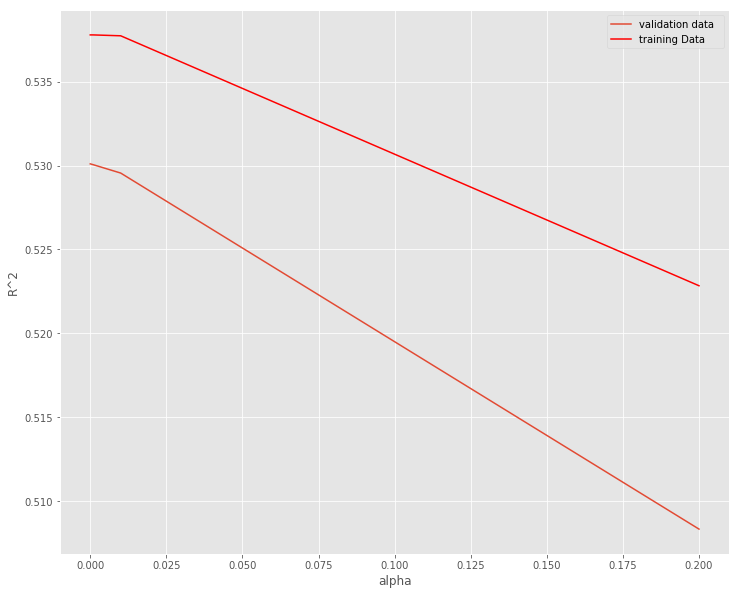

In [250]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [251]:
k = 2
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
neigh
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.1059001512859304
Test set Accuracy:  0.020161290322580645


/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [252]:

#print ('Coefficients: ', neigh.coef_)
#print ('Intercept: ',neigh.intercept_)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % metrics.mean_squared_error(y_test, yhat))
print("R2-score: %.2f" % metrics.r2_score(y_test, yhat) )

Residual sum of squares (MSE): 65096.34
R2-score: 0.52


In [253]:
# kNN: Decide k value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.00806452, 0.02016129, 0.02016129, 0.02016129, 0.0141129 ,
       0.01612903, 0.0141129 , 0.01612903, 0.01209677])

####  Model 2: Total COVID-19 tests (regardless of test result)  =  total population

In [254]:
#Data Partition
X = df_reg[['pop_total']]
y = df_reg[['Total']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1983, 1) (1983, 1)
Test set: (496, 1) (496, 1)


In [255]:
# Linear Regression
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)


print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )


Coefficients:  [[0.01503493]]
Intercept:  [64.5261028]
Mean absolute error: 265.78
Residual sum of squares (MSE): 141526.16
R2-score: 0.15


In [189]:
# Ridge Regression
ridgereg = Ridge(alpha=1e-4,normalize=True)

ridgereg.fit(X_train,y_train)

test_y_hat = ridgereg.predict(X_test)

print ('Coefficients: ', ridgereg.coef_)
print ('Intercept: ',ridgereg.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )

Coefficients:  [[0.01503342]]
Intercept:  [64.59829617]
Mean absolute error: 265.78
Residual sum of squares (MSE): 141526.39
R2-score: 0.15


In [184]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.2]
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa,normalize=True) 
    RigeModel.fit(X_train, y_train)
    Rsqu_test.append(RigeModel.score(X_test, y_test))
    Rsqu_train.append(RigeModel.score(X_train, y_train))

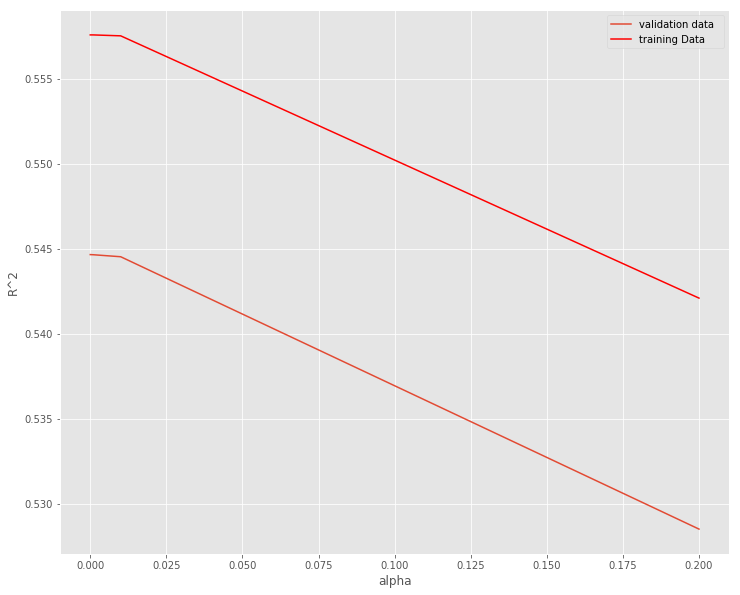

In [185]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [193]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
neigh
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

Train set Accuracy:  0.10640443772062531
Test set Accuracy:  0.012096774193548387


/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


In [194]:

#print ('Coefficients: ', neigh.coef_)
#print ('Intercept: ',neigh.intercept_)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % metrics.mean_squared_error(y_test, yhat))
print("R2-score: %.2f" % metrics.r2_score(y_test, yhat) )

Residual sum of squares (MSE): 200262.21
R2-score: 0.36


In [192]:
# kNN: Decide k value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.00604839, 0.01612903, 0.01612903, 0.01814516, 0.01209677,
       0.01209677, 0.01008065, 0.01008065, 0.00806452])

####  Model 3: proportion of population testing positive for COVID-19 = Day in April

In [256]:
#Data Partition
X = np.asarray(df_reg[['date']])
y = np.asarray(df_reg[['covid_prop']])
X = X.astype('int')

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1983, 1) (1983, 1)
Test set: (496, 1) (496, 1)


In [257]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
neigh
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Unknown label type: 'continuous'

####  Model 4: covid_prop = Median income  

In [265]:
#Data Partition
df_reg = df
X = df_reg[['median_income']]
y = df_reg[['covid_prop']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1983, 1) (1983, 1)
Test set: (496, 1) (496, 1)


In [266]:
# Linear Regression
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)


print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )


Coefficients:  [[-7.0303799e-08]]
Intercept:  [0.01204515]
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -7.41


In [267]:
# Ridge Regression
ridgereg = Ridge(alpha=1e-4,normalize=True)

ridgereg.fit(X_train,y_train)

test_y_hat = ridgereg.predict(X_test)

print ('Coefficients: ', ridgereg.coef_)
print ('Intercept: ',ridgereg.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )

Coefficients:  [[-7.02967693e-08]]
Intercept:  [0.01204488]
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -7.42


In [268]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.2]
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa,normalize=True) 
    RigeModel.fit(X_train, y_train)
    Rsqu_test.append(RigeModel.score(X_test, y_test))
    Rsqu_train.append(RigeModel.score(X_train, y_train))

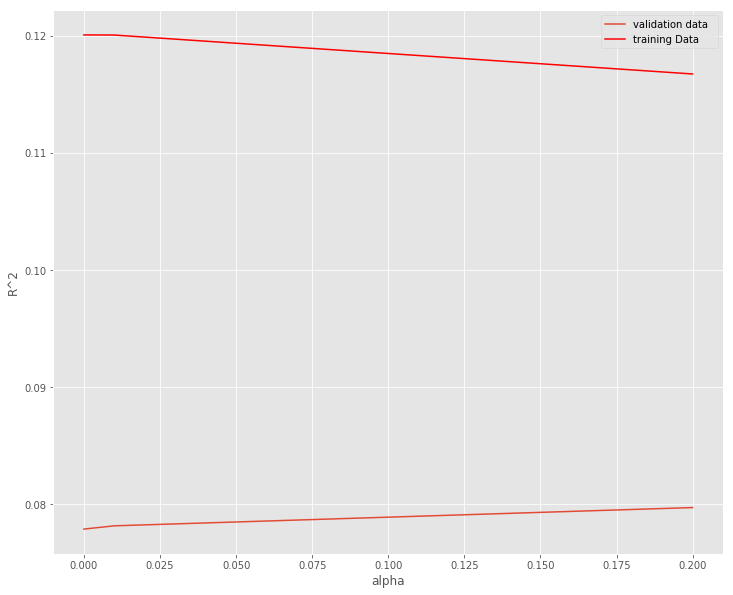

In [269]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [270]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
neigh
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Unknown label type: 'continuous'

In [194]:

#print ('Coefficients: ', neigh.coef_)
#print ('Intercept: ',neigh.intercept_)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % metrics.mean_squared_error(y_test, yhat))
print("R2-score: %.2f" % metrics.r2_score(y_test, yhat) )

Residual sum of squares (MSE): 200262.21
R2-score: 0.36


In [192]:
# kNN: Decide k value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.00604839, 0.01612903, 0.01612903, 0.01814516, 0.01209677,
       0.01209677, 0.01008065, 0.01008065, 0.00806452])

####  Model 5: COVID-19 rate = Date + Median Income + Zip Code Population

In [281]:
df_reg = df_reg[['MODZCTA','covid_prop', 'median_income', 'pop_total']]
df_reg = df_reg.groupby(['MODZCTA','covid_prop'], as_index = False).max().reset_index()
df_reg = df_reg.reset_index()
df_reg.tail()

,level_0,index,MODZCTA,covid_prop,median_income,pop_total
2246,2246,2246,11697.0,0.014046,42183.0,3702.0
2247,2247,2247,11697.0,0.016478,42183.0,3702.0
2248,2248,2248,11697.0,0.017018,42183.0,3702.0
2249,2249,2249,11697.0,0.017558,42183.0,3702.0
2250,2250,2250,11697.0,0.018639,42183.0,3702.0


In [283]:
#Data Partition
#df_reg = df
X = df_reg[['median_income', 'date','pop_total']]
y = df_reg[['covid_prop']]

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (1800, 2) (1800, 1)
Test set: (451, 2) (451, 1)


In [284]:
# Linear Regression
regr = linear_model.LinearRegression()
regr.fit (X_train, y_train)


print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

test_y_hat = regr.predict(X_test)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )


Coefficients:  [[-8.3866609e-08 -2.8051398e-08]]
Intercept:  [0.01401438]
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -6.31


In [277]:
# Ridge Regression
ridgereg = Ridge(alpha=1e-15,normalize=True)

ridgereg.fit(X_train,y_train)

test_y_hat = ridgereg.predict(X_test)

print ('Coefficients: ', ridgereg.coef_)
print ('Intercept: ',ridgereg.intercept_)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(test_y_hat , y_test) )

Coefficients:  [[-8.39835811e-08  6.40945643e-04 -3.00243272e-08]]
Intercept:  [0.00856069]
Mean absolute error: 0.00
Residual sum of squares (MSE): 0.00
R2-score: -0.15


In [275]:
Rsqu_test = []
Rsqu_train = []
dummy1 = []
ALFA = [1e-15, 1e-10, 1e-8, 1e-4, 1e-3,1e-2, 0.2]
for alfa in ALFA:
    RigeModel = Ridge(alpha=alfa,normalize=True) 
    RigeModel.fit(X_train, y_train)
    Rsqu_test.append(RigeModel.score(X_test, y_test))
    Rsqu_train.append(RigeModel.score(X_train, y_train))

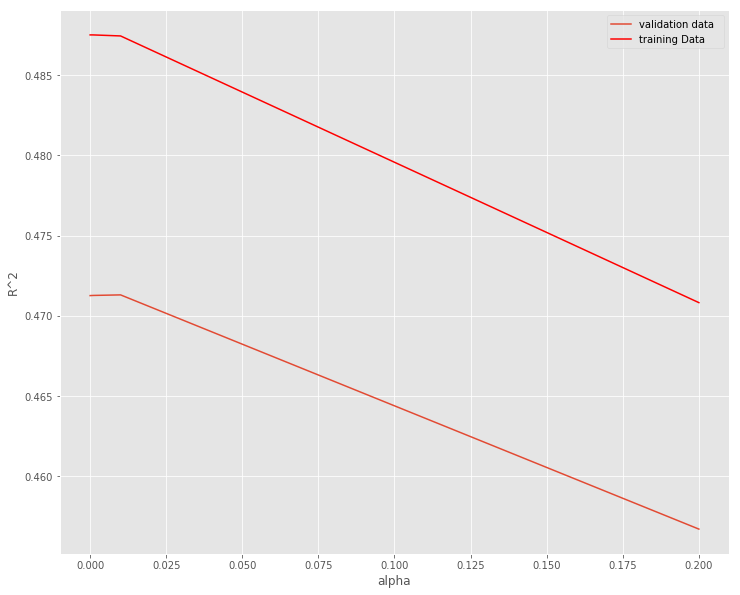

In [276]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(ALFA,Rsqu_test, label='validation data  ')
plt.plot(ALFA,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

In [278]:
k = 5
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(X_train,y_train)
yhat = neigh.predict(X_test)
neigh
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(X_train)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


ValueError: Unknown label type: 'continuous'

In [194]:

#print ('Coefficients: ', neigh.coef_)
#print ('Intercept: ',neigh.intercept_)

#print("Mean absolute error: %.2f" % np.mean(np.absolute(yhat - y_test)))
print("Residual sum of squares (MSE): %.2f" % metrics.mean_squared_error(y_test, yhat))
print("R2-score: %.2f" % metrics.r2_score(y_test, yhat) )

Residual sum of squares (MSE): 200262.21
R2-score: 0.36


In [192]:
# kNN: Decide k value
Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
ConfustionMx = [];
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)
    #std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  if __name__ == '__main__':
/Users/deepikadilip/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to

array([0.00604839, 0.01612903, 0.01612903, 0.01814516, 0.01209677,
       0.01209677, 0.01008065, 0.01008065, 0.00806452])

## Folium/Foursquare Clusters

In [313]:
import geopandas as gpd
import earthpy as et
import json

In [299]:
nyc_geo_file = gpd.read_file('nyc shape file/ZIP_CODE_040114.shp')

In [300]:
nyc_geo_file 

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
0,11436,0,Jamaica,18681.0,2.269930e+07,NY,Queens,36,081,http://www.usps.com/,0.0,0.0,"POLYGON ((1038098.251871482 188138.3800067157,..."
1,11213,0,Brooklyn,62426.0,2.963100e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1001613.712964058 186926.4395172149,..."
2,11212,0,Brooklyn,83866.0,4.197210e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((1011174.275535807 183696.33770971, 1..."
3,11225,0,Brooklyn,56527.0,2.369863e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995908.3654508889 183617.6128015518,..."
4,11218,0,Brooklyn,72280.0,3.686880e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((991997.1134308875 176307.4958601296,..."
5,11226,0,Brooklyn,106132.0,3.940860e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994821.4729396403 177865.7178093046,..."
6,11219,0,Brooklyn,92561.0,4.200274e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((987286.3515269756 173946.4621963799,..."
7,11210,0,Brooklyn,67067.0,4.788702e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((995796.0097044706 171110.0666224658,..."
8,11230,0,Brooklyn,80857.0,4.992670e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((994099.2959063053 171240.7064530551,..."
9,11204,0,Brooklyn,77354.0,4.355518e+07,NY,Kings,36,047,http://www.usps.com/,0.0,0.0,"POLYGON ((989500.1699339747 170730.1687602103,..."


In [310]:
json_url = 'https://geo.nyu.edu/download/file/nyu-2451-34509-geojson.json'

!wget -q -O 'nyu.json' https://geo.nyu.edu/download/file/nyu-2451-34509-geojson.json


In [314]:
with open('nyu.json') as json_data:
    nyu_data = json.load(json_data)

In [315]:
nyu_data

{'type': 'FeatureCollection',
 'totalFeatures': 214,
 'features': [{'type': 'Feature',
   'id': 'nyu_2451_34509.1',
   'geometry': {'type': 'MultiPolygon',
    'coordinates': [[[[-74.00368399999996, 40.748354999999826],
       [-74.00652899999999, 40.749552999999814],
       [-74.00702299999996, 40.748889999999825],
       [-74.00862099999998, 40.749522999999826],
       [-74.00848699999997, 40.75035699999981],
       [-74.00794499999998, 40.75175999999982],
       [-74.00771299999997, 40.75244399999981],
       [-74.00744899999998, 40.75316499999982],
       [-74.00721799999998, 40.75387299999982],
       [-74.00681499999999, 40.75452199999982],
       [-74.00573299999999, 40.75596999999983],
       [-74.00543699999999, 40.75636399999982],
       [-74.00492699999998, 40.75702299999983],
       [-74.00294199999998, 40.75973099999982],
       [-74.00006699999999, 40.75840299999983],
       [-74.00013799999996, 40.7583069999998],
       [-74.00058399999999, 40.75769299999981],
       [-7

In [348]:
df_map = df[['MODZCTA','covid_prop']]
df_map = df_map.groupby(['MODZCTA'], as_index = False).max().reset_index()
df_map.head()


,index,MODZCTA,covid_prop
0,0,10001.0,0.009939
1,1,10002.0,0.008277
2,2,10003.0,0.005869
3,3,10004.0,0.007692
4,4,10005.0,0.004724


In [349]:
df_map = df_map.rename(columns={"MODZCTA": "zcta"})


In [350]:
df_map['zcta']=df_map['zcta'].astype('int').astype('str')


In [351]:
df_map.head()


,index,zcta,covid_prop
0,0,10001,0.009939
1,1,10002,0.008277
2,2,10003,0.005869
3,3,10004,0.007692
4,4,10005,0.004724


In [426]:
# define the world map centered around Canada with a higher zoom level
world_map = folium.Map(location=[40.7128, -73.99], zoom_start=11)



world_map.choropleth(
    geo_data=nyu_data,
    data=df_map,
    columns=['zcta', 'covid_prop'],
    key_on='feature.properties.zcta',
    fill_color='YlOrRd', 
    fill_opacity=0.7, 
    line_opacity=0.2,
    legend_name='Proportion of the population with COVID-19'
)

# display world map
world_map

## Foursquare Clusters

In [418]:
#Foursquare

CLIENT_ID = "2FFHKTUXBOXPJ53IQAYQC2D233FJFJQKOMXNLJW34JDZKERS"
CLIENT_SECRET = "SDILA4ZHVZGKMDXATMLFYNA25MS0LFXZHPYPERPRSEQ1FMII"
VERSION = '20200419' 
LIMIT = '100'

categoryId = 'bf58dd8d48988d196941735'
lat = 40.7128
lng = -73.99
radius = 1000000
search_query = 'hospital'

In [419]:
# define the dataframe columns
column_names = ['Name', 'Latitude', 'Longitude', 'Categories'] 

# instantiate the dataframe
nyc_hosp = pd.DataFrame(columns=column_names)

In [420]:
url2 = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, lat, lng, VERSION, search_query, radius, LIMIT)
url2

'https://api.foursquare.com/v2/venues/search?client_id=2FFHKTUXBOXPJ53IQAYQC2D233FJFJQKOMXNLJW34JDZKERS&client_secret=SDILA4ZHVZGKMDXATMLFYNA25MS0LFXZHPYPERPRSEQ1FMII&ll=40.7128,-73.99&v=20200419&query=hospital&radius=1000000&limit=100'

In [421]:
results = requests.get(url2).json()
results
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.crossStreet,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.neighborhood,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4a82ef0af964a52092f91fe3,170 William St,US,New York,United States,at Gold St,1285,"[170 William St (at Gold St), New York, NY 100...","[{'label': 'display', 'lat': 40.7099166, 'lng'...",40.709917,-74.004758,NaN,10038,NY,NewYork-Presbyterian-Lower Manhattan Hospital,v-1587273801,NaN
1,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4a43baaaf964a520b9a61fe3,462 1st Ave,US,New York,United States,between E 26th & E 29th St.,3201,"[462 1st Ave (between E 26th & E 29th St.), Ne...","[{'label': 'display', 'lat': 40.73972514676565...",40.739725,-73.976661,NaN,10016,NY,Bellevue Hospital Center,v-1587273801,NaN
2,"[{'id': '4bf58dd8d48988d194941735', 'name': 'E...",False,4bad1a23f964a520b62d3be3,NaN,US,New York,United States,NaN,1280,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.70998454215684...",40.709985,-74.004720,NaN,NaN,NY,NY Presbyterian Hospital Lower Manhattan Hosp ER,v-1587273801,NaN
3,"[{'id': '4d954af4a243a5684765b473', 'name': 'V...",False,4b1c0e79f964a5205c0124e3,5 Lispenard St,US,New York,United States,Near Corner of 6th Avenue and Lispenard,1524,[5 Lispenard St (Near Corner of 6th Avenue and...,"[{'label': 'display', 'lat': 40.72057803284648...",40.720578,-74.004869,NaN,10013,NY,Tribeca Soho Animal Hospital,v-1587273801,33365451
4,"[{'id': '4bf58dd8d48988d196941735', 'name': 'H...",False,4a5bece4f964a52000bc1fe3,525 E 68th St Fl 6,US,New York,United States,at York Ave,6534,"[525 E 68th St Fl 6 (at York Ave), New York, N...","[{'label': 'display', 'lat': 40.76480204304722...",40.764802,-73.954055,NaN,10065,NY,New York Presbyterian Hospital Weill Cornell M...,v-1587273801,NaN


In [422]:
# keep only columns that include venue name, and anything that is associated with location
filtered_columns = ['name', 'categories'] + [col for col in dataframe.columns if col.startswith('location.')] + ['id']
dataframe_filtered = dataframe.loc[:, filtered_columns]

# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
dataframe_filtered['categories'] = dataframe_filtered.apply(get_category_type, axis=1)

# clean column names by keeping only last term
dataframe_filtered.columns = [column.split('.')[-1] for column in dataframe_filtered.columns]

dataframe_filtered

,name,categories,address,cc,city,country,crossStreet,distance,formattedAddress,labeledLatLngs,lat,lng,neighborhood,postalCode,state,id
0,NewYork-Presbyterian-Lower Manhattan Hospital,Hospital,170 William St,US,New York,United States,at Gold St,1285,"[170 William St (at Gold St), New York, NY 100...","[{'label': 'display', 'lat': 40.7099166, 'lng'...",40.709917,-74.004758,NaN,10038,NY,4a82ef0af964a52092f91fe3
1,Bellevue Hospital Center,Hospital,462 1st Ave,US,New York,United States,between E 26th & E 29th St.,3201,"[462 1st Ave (between E 26th & E 29th St.), Ne...","[{'label': 'display', 'lat': 40.73972514676565...",40.739725,-73.976661,NaN,10016,NY,4a43baaaf964a520b9a61fe3
2,NY Presbyterian Hospital Lower Manhattan Hosp ER,Emergency Room,NaN,US,New York,United States,NaN,1280,"[New York, NY, United States]","[{'label': 'display', 'lat': 40.70998454215684...",40.709985,-74.004720,NaN,NaN,NY,4bad1a23f964a520b62d3be3
3,Tribeca Soho Animal Hospital,Veterinarian,5 Lispenard St,US,New York,United States,Near Corner of 6th Avenue and Lispenard,1524,[5 Lispenard St (Near Corner of 6th Avenue and...,"[{'label': 'display', 'lat': 40.72057803284648...",40.720578,-74.004869,NaN,10013,NY,4b1c0e79f964a5205c0124e3
4,New York Presbyterian Hospital Weill Cornell M...,Hospital,525 E 68th St Fl 6,US,New York,United States,at York Ave,6534,"[525 E 68th St Fl 6 (at York Ave), New York, N...","[{'label': 'display', 'lat': 40.76480204304722...",40.764802,-73.954055,NaN,10065,NY,4a5bece4f964a52000bc1fe3
5,The Brooklyn Hospital Center,Hospital,121 Dekalb Ave,US,Brooklyn,United States,at Ashland Pl.,2715,"[121 Dekalb Ave (at Ashland Pl.), Brooklyn, NY...","[{'label': 'display', 'lat': 40.69023812388737...",40.690238,-73.977771,NaN,11201,NY,4aed5b59f964a52087cd21e3
6,The Mount Sinai Hospital,Hospital,1468 Madison Avenue,US,New York,United States,at E 101st St,9150,"[1468 Madison Avenue (at E 101st St), New York...","[{'label': 'display', 'lat': 40.7899953, 'lng'...",40.789995,-73.952725,NaN,10029,NY,4a9d8f44f964a5207e3820e3
7,NewYork-Presbyterian Brooklyn Methodist Hospital,Hospital,506 6th St,US,Brooklyn,United States,7th Ave.,5113,"[506 6th St (7th Ave.), Brooklyn, NY 11215, Un...","[{'label': 'display', 'lat': 40.6677145, 'lng'...",40.667715,-73.978424,"Park Slope, Brooklyn, NY",11215,NY,4a386563f964a520f29e1fe3
8,Brooklyn Hospital ER,Emergency Room,NaN,US,Brooklyn,United States,NaN,2753,"[Brooklyn, NY 11217, United States]","[{'label': 'display', 'lat': 40.68993488248496...",40.689935,-73.977551,NaN,11217,NY,4cdea93adf986ea8911fdd16
9,Bellevue Hospital Center Speciality Surgery,Hospital,462 1st Ave,US,New York,United States,btwn 26th & 28th St,3211,"[462 1st Ave (btwn 26th & 28th St), New York, ...","[{'label': 'display', 'lat': 40.73978569824062...",40.739786,-73.976538,NaN,10016,NY,4ecbe09261afbf06d9728daf


In [423]:
dataframe_filtered.name

0         NewYork-Presbyterian-Lower Manhattan Hospital
1                              Bellevue Hospital Center
2      NY Presbyterian Hospital Lower Manhattan Hosp ER
3                          Tribeca Soho Animal Hospital
4     New York Presbyterian Hospital Weill Cornell M...
5                          The Brooklyn Hospital Center
6                              The Mount Sinai Hospital
7      NewYork-Presbyterian Brooklyn Methodist Hospital
8                                  Brooklyn Hospital ER
9           Bellevue Hospital Center Speciality Surgery
10        Bellevue Hospital Center Psych Ward (C.P.E.P)
11                      Bellevue Hospital Ambulance Bay
12                          Bellevue Hospital Center ER
13                      NYU Hospital for Joint Diseases
14    The Brooklyn Hospital Center - Williamsburg Fa...
15                         Hospital for Special Surgery
16                     Battery Park Veterinary Hospital
17                                  Lenox Hill H

In [448]:
zip_freq = dataframe_filtered.groupby(['postalCode'], as_index = False).count().reset_index()

zip_freq = zip_freq.rename(columns={"postalCode": "MODZCTA"})
zip_freq.MODZCTA = zip_freq['MODZCTA'].astype(float)
merged = zip_freq.merge(df, on='MODZCTA')


In [454]:
merged2 = merged[merged.date == 3]
merged2.sort_values(by='name', ascending=False)

,index,MODZCTA,name,categories,address,cc,city,country,crossStreet,distance,...,state,id,Positive,Total,date,zcta_cum.perc_pos,median_income,pop_total,covid_prop,covid_prop_pcnt
43,7,10016.0,5,5,5,5,5,5,4,5,...,5,5,295.0,661,3.0,44.63,74746.0,51448.0,0.005734,0.573394
1,4,10003.0,3,3,3,3,3,3,3,3,...,3,3,191.0,438,3.0,43.61,65568.0,55035.0,0.003471,0.347052
71,9,10029.0,3,3,3,3,3,3,3,3,...,3,3,373.0,807,3.0,46.22,20224.0,80866.0,0.004613,0.461257
29,6,10014.0,2,2,2,2,2,2,2,2,...,2,2,163.0,347,3.0,46.97,86615.0,31794.0,0.005127,0.512675
57,8,10021.0,2,2,2,2,2,2,1,2,...,2,2,258.0,672,3.0,38.39,83497.0,44983.0,0.005736,0.573550
85,10,10032.0,2,2,2,2,2,2,1,2,...,2,2,389.0,670,3.0,58.06,20447.0,63185.0,0.006157,0.615652
211,20,11203.0,2,2,2,2,2,2,1,2,...,2,2,466.0,737,3.0,63.23,27633.0,75989.0,0.006132,0.613247
127,13,10065.0,2,2,2,2,2,2,2,2,...,2,2,158.0,460,3.0,34.35,82469.0,29565.0,0.005344,0.534416
295,26,11235.0,1,1,1,1,1,1,1,1,...,1,1,421.0,841,3.0,50.06,26731.0,80222.0,0.005248,0.524794
267,24,11217.0,1,1,0,1,1,1,0,1,...,1,1,161.0,321,3.0,50.16,54269.0,39687.0,0.004057,0.405674


In [442]:
ven_lat = 40.7699
ven_lng = -73.9752
venues_map = folium.Map(location=[ven_lat, ven_lng], zoom_start=3) 

for lat, lng, label in zip(dataframe_filtered.lat, dataframe_filtered.lng, dataframe_filtered.categories):
    folium.features.CircleMarker(
        [lat, lng],
        radius=5,
        color='blue',
        popup=label,
        fill = True,
        fill_color='blue',
        fill_opacity=0.6
    ).add_to(venues_map)

venues_map

## Old Demographic Data from the NYC Gov

In [ ]:
dem_url="https://data.cityofnewyork.us/resource/kku6-nxdu.csv"
dem_data = pd.read_csv(dem_url)

In [ ]:
dem_data.head()

In [ ]:
dem_data = dem_data.rename(columns={"jurisdiction_name": "MODZCTA"})

In [ ]:
dem_data.dtypes

In [ ]:
dem_data[['percent_receives_public_assistance']].describe()

In [ ]:
df = covid_data.merge(dem_data, on='MODZCTA')

In [ ]:
df.dtypes

----------------------------------------------
## *Completely Useless*